# Data Cleaning and Exploration
By Rachel Shurberg

1. [Import the Data](#Import)
2. [Cleaning the Data](#cleaning)
3. [Make Bucket Data Sets by Division](#buckets)
4. [Update the Data with More Metrics](#Update)
5. [Data Exploration](#Explore)
6. [Data Visualizations](#Visual)

## 1. Import the Data <a class="anchor" id="Import"></a>

In [2]:
import pandas as pd

data = pd.read_csv('Player Data with Blast.csv')
print(data.shape)
data

(5958, 32)


,CSE_PlayerID,CSE_EventID,Bucket,Date,CollegeDivision,CollegePlayerType,Obj_FootSpeed_H11,Obj_FootSpeed_H12,Obj_FootSpeed_HH1,Obj_FootSpeed_HH2,...,Obj_ExitVelo_Swing3,Plane,Connection,Rotation,BatSpeed,RotationalAcceleration,OnPlaneEfficiency,Power,TimeToContact,PeakHandSpeed
0,1312.0,516.0,4.0,10/12/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1313.0,516.0,4.0,10/12/2020,NaN,NaN,3.25,3.20,13.02,12.67,...,NaN,53.0,42.0,71.0,59.7,14.9,66.0,2.25,0.16,16.0
2,1314.0,516.0,4.0,10/12/2020,NaN,NaN,3.03,2.82,11.96,11.76,...,NaN,69.0,58.0,48.0,52.7,7.3,82.0,1.44,0.19,14.9
3,1315.0,516.0,4.0,10/12/2020,NaN,NaN,3.39,3.19,12.64,12.79,...,NaN,57.0,58.0,58.0,64.1,10.5,70.0,2.39,0.17,20.1
4,1316.0,516.0,4.0,10/12/2020,NaN,NaN,2.84,3.13,13.22,13.06,...,NaN,44.0,44.0,40.0,53.4,4.7,56.0,1.32,0.18,15.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5953,7283.0,1829.0,4.0,2/24/2023,NAIA,Role Player,NaN,NaN,NaN,NaN,...,NaN,53.0,42.0,45.0,49.9,6.3,66.0,1.23,0.20,14.2
5954,10284.0,1829.0,4.0,2/24/2023,NAIA,Role Player,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5955,10279.0,1829.0,4.0,2/24/2023,NAIA,Starter,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5956,7280.0,1829.0,4.0,2/24/2023,NAIA,Role Player,NaN,NaN,NaN,NaN,...,NaN,54.0,52.0,54.0,58.7,9.2,67.0,2.12,0.16,16.5


In [4]:
data.columns

Index(['CSE_PlayerID', 'CSE_EventID', 'UniversityName', 'Bucket', 'Date',
       'CollegeDivision', 'CollegePlayerType', 'Obj_FootSpeed_H11',
       'Obj_FootSpeed_H12', 'Obj_FootSpeed_HH1', 'Obj_FootSpeed_HH2',
       'Obj_ArmVelo_Throw1', 'Obj_ArmVelo_Throw2', 'Obj_ArmVelo_Throw3',
       'Obj_ArmVelo_Throw4', 'Obj_ArmVelo_Throw5', 'Obj_ArmVelo_Throw6',
       'Obj_PopTime_Throw1', 'Obj_PopTime_Throw2', 'Obj_PopTime_Throw3',
       'Obj_PopTime_Throw4', 'Obj_ExitVelo_Swing1', 'Obj_ExitVelo_Swing2',
       'Obj_ExitVelo_Swing3', 'Plane', 'Connection', 'Rotation', 'BatSpeed',
       'RotationalAcceleration', 'OnPlaneEfficiency', 'Power', 'TimeToContact',
       'PeakHandSpeed'],
      dtype='object')

## 2. Data Cleaning <a class="anchor" id="cleaning"></a>
The data cleaning consists of removing any players from the dataset if they don't have a collegePlayerType. The average of each metric is calculated and added as a new variable. The number of non-empty average values is calculated and added as a variable. The pop time metric is dropped since only catchers are tested on that, so most of the players don't have those values.

### Drop players without a player type label:

In [73]:
data2 = data[(data['CollegePlayerType']=='Role Player') |  (data['CollegePlayerType']=='Impact Player') |  (data['CollegePlayerType']=='Starter')]

In [74]:
data.shape

(5958, 33)

In [75]:
data2.shape

(5400, 33)

In [106]:
data2.head()

,CSE_PlayerID,CSE_EventID,UniversityName,Bucket,Date,CollegeDivision,CollegePlayerType,Obj_FootSpeed_H11,Obj_FootSpeed_H12,Obj_FootSpeed_HH1,...,Obj_ExitVelo_Swing3,Plane,Connection,Rotation,BatSpeed,RotationalAcceleration,OnPlaneEfficiency,Power,TimeToContact,PeakHandSpeed
153,3351.0,617.0,University of Minnesota Crookston,3.0,2021-09-08,Division 2,Starter,3.34,NaN,13.39,...,NaN,50.0,37.0,48.0,64.0,8.6,65.0,2.44,0.17,19.7
154,3352.0,617.0,University of Minnesota Crookston,3.0,2021-09-08,Division 2,Starter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,3353.0,617.0,University of Minnesota Crookston,3.0,2021-09-08,Division 2,Starter,3.32,NaN,12.55,...,NaN,40.0,57.0,40.0,61.6,5.8,56.0,2.11,0.18,18.0
156,3354.0,617.0,University of Minnesota Crookston,3.0,2021-09-08,Division 2,Role Player,3.69,NaN,14.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,3355.0,617.0,University of Minnesota Crookston,3.0,2021-09-08,Division 2,Role Player,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
#data2

In [92]:
statsDict={'H1':['Obj_FootSpeed_H11','Obj_FootSpeed_H12',],
           'HH':['Obj_FootSpeed_HH1','Obj_FootSpeed_HH2'],
          'armVelo':['Obj_ArmVelo_Throw1','Obj_ArmVelo_Throw2','Obj_ArmVelo_Throw3','Obj_ArmVelo_Throw4','Obj_ArmVelo_Throw5','Obj_ArmVelo_Throw6'],
        'popTime':['Obj_PopTime_Throw1','Obj_PopTime_Throw2','Obj_PopTime_Throw3','Obj_PopTime_Throw4'],
          'exitVelo':['Obj_ExitVelo_Swing1','Obj_ExitVelo_Swing2','Obj_ExitVelo_Swing3']}

In [80]:
varDict={'H1':[],'HH':[],'armVelo':[],'popTime':[],'exitVelo':[]}

### Calculate the average of trials for each category:

In [81]:
import statistics

for ind in data2.index:
    for stat in statsDict.keys():
        #print('*********'+stat+'*********')
        statList=[]
        for trial in statsDict[stat]:
            if data2[trial][ind]>0:
                statList.append(data2[trial][ind])
        if len(statList)==0:
            var=0
        else:
            var=float(statistics.mean(statList))
        #print(var)
        varDict[stat].append(var)

In [82]:
dataAvgs=data2

### Add the category averages as their own columns:

In [83]:
dataAvgs=dataAvgs.assign(H1=varDict['H1'])
dataAvgs=dataAvgs.assign(HH=varDict['HH'])
dataAvgs=dataAvgs.assign(armVelo=varDict['armVelo'])
dataAvgs=dataAvgs.assign(popTime=varDict['popTime'])
dataAvgs=dataAvgs.assign(exitVelo=varDict['exitVelo'])

In [69]:
#dataAvgs

In [84]:
# only catchers have poptime
dataAvgs['popTime']

153     0.0
154     0.0
155     0.0
156     0.0
157     0.0
       ... 
5953    0.0
5954    0.0
5955    0.0
5956    0.0
5957    0.0
Name: popTime, Length: 5400, dtype: float64

### Create a variable that says how many categories aren't empty

In [85]:
notEmptyList=[]

for ind in dataAvgs.index:
    count=0
    for category in varDict.keys():
        if dataAvgs[category][ind]!=0:
            count+=1
    notEmptyList.append(count)       

In [68]:
#notEmptyList

In [86]:
dataAvgs=dataAvgs.assign(notEmpty=notEmptyList)

In [67]:
#dataAvgs

### Find the number of empty values in each category

In [87]:
dataAvgs['H1'].value_counts()

0.000    1086
3.080      69
3.000      69
3.200      68
3.050      68
         ... 
3.520       1
3.565       1
3.555       1
2.620       1
3.930       1
Name: H1, Length: 318, dtype: int64

In [88]:
dataAvgs['HH'].value_counts()

0.000     1366
12.200      36
12.500      36
12.700      28
12.400      28
          ... 
13.055       1
10.890       1
14.870       1
12.755       1
15.440       1
Name: HH, Length: 694, dtype: int64

In [89]:
dataAvgs['armVelo'].value_counts()

0.000000     1170
55.000000     124
53.000000     123
56.000000     122
54.000000     121
             ... 
57.600000       1
58.400000       1
62.750000       1
67.250000       1
67.166667       1
Name: armVelo, Length: 256, dtype: int64

In [90]:
dataAvgs['popTime'].value_counts()

0.000000    4697
1.930000      10
1.750000      10
1.875000       9
1.970000       8
            ... 
2.216667       1
2.055000       1
2.032500       1
1.972500       1
1.943333       1
Name: popTime, Length: 335, dtype: int64

In [91]:
dataAvgs['exitVelo'].value_counts()

0.000000     1034
64.000000     117
65.000000     112
66.000000     107
62.000000     102
             ... 
77.500000       1
80.500000       1
36.000000       1
73.740000       1
79.333333       1
Name: exitVelo, Length: 173, dtype: int64

In [109]:
dataAvgs['Plane'].value_counts()

59.0    77
50.0    75
60.0    74
52.0    68
57.0    67
54.0    67
62.0    64
45.0    62
56.0    61
61.0    61
64.0    60
51.0    59
48.0    59
55.0    59
58.0    58
66.0    57
53.0    56
46.0    55
49.0    49
47.0    47
40.0    45
67.0    42
65.0    42
38.0    41
68.0    41
41.0    39
63.0    39
42.0    39
43.0    35
69.0    34
71.0    33
39.0    31
37.0    31
44.0    31
70.0    29
35.0    28
72.0    26
73.0    25
32.0    23
36.0    22
33.0    21
30.0    19
76.0    17
75.0    16
31.0    13
34.0    13
74.0    13
78.0    12
29.0    10
77.0     9
27.0     8
28.0     8
79.0     7
26.0     5
21.0     4
23.0     3
80.0     2
25.0     1
24.0     1
Name: Plane, dtype: int64

In [110]:
dataAvgs['Connection'].value_counts()

56.0    101
54.0     96
58.0     96
55.0     90
59.0     88
57.0     88
51.0     86
52.0     84
49.0     84
61.0     81
53.0     76
47.0     75
63.0     72
48.0     71
50.0     69
60.0     67
46.0     62
62.0     54
44.0     53
64.0     53
45.0     50
65.0     49
42.0     48
66.0     36
43.0     36
67.0     33
68.0     29
40.0     28
41.0     26
38.0     26
39.0     25
69.0     22
37.0     18
36.0     18
70.0     17
34.0     14
35.0     10
71.0      9
72.0      7
28.0      6
31.0      6
33.0      6
32.0      5
29.0      5
74.0      5
73.0      4
26.0      3
27.0      2
22.0      1
23.0      1
75.0      1
30.0      1
Name: Connection, dtype: int64

In [111]:
dataAvgs['Rotation'].value_counts()

48.0    87
50.0    85
53.0    78
51.0    78
54.0    76
52.0    73
47.0    70
57.0    69
56.0    69
49.0    68
45.0    67
46.0    67
55.0    59
64.0    57
58.0    56
44.0    55
42.0    54
61.0    53
62.0    51
59.0    50
60.0    49
43.0    44
63.0    44
41.0    44
66.0    40
40.0    39
65.0    36
79.0    33
75.0    32
80.0    31
72.0    29
39.0    29
67.0    28
70.0    27
71.0    26
38.0    26
69.0    26
76.0    24
68.0    24
78.0    23
74.0    21
36.0    21
37.0    19
77.0    18
73.0    16
35.0    10
34.0     5
33.0     2
32.0     2
29.0     1
31.0     1
28.0     1
Name: Rotation, dtype: int64

In [112]:
dataAvgs['BatSpeed'].value_counts()

57.0    29
54.2    29
58.0    27
57.2    25
58.4    25
        ..
48.7     1
72.3     1
47.3     1
45.7     1
42.0     1
Name: BatSpeed, Length: 244, dtype: int64

In [113]:
dataAvgs['RotationalAcceleration'].value_counts()

7.8     31
8.1     30
7.0     29
9.3     28
9.2     27
        ..
16.3     1
21.3     1
22.6     1
2.5      1
2.7      1
Name: RotationalAcceleration, Length: 211, dtype: int64

In [114]:
dataAvgs['OnPlaneEfficiency'].value_counts()

72.0    71
71.0    70
73.0    67
69.0    66
65.0    66
        ..
35.0     2
29.0     1
34.0     1
97.0     1
36.0     1
Name: OnPlaneEfficiency, Length: 62, dtype: int64

In [115]:
dataAvgs['Power'].value_counts()

1.79    30
1.85    29
1.94    29
2.00    29
2.10    27
        ..
1.22     1
3.24     1
3.34     1
1.28     1
0.89     1
Name: Power, Length: 219, dtype: int64

In [116]:
dataAvgs['TimeToContact'].value_counts()

0.17    588
0.16    519
0.18    387
0.15    237
0.19    198
0.20     61
0.14     59
0.13     19
0.21     16
0.22      5
0.23      2
0.27      1
0.24      1
Name: TimeToContact, dtype: int64

In [117]:
dataAvgs['PeakHandSpeed'].value_counts()

17.7    65
17.8    61
17.5    56
17.6    56
16.9    56
        ..
11.8     1
23.6     1
13.3     1
12.8     1
21.9     1
Name: PeakHandSpeed, Length: 107, dtype: int64

Pop time has the most empty values.

### Select data from players that have statistics from at least 3, 4, and 5 categories

At least 3 categories:

In [93]:
data3Plus=dataAvgs[dataAvgs['notEmpty']>=3]

In [18]:
data3Plus.shape

(4141, 29)

At least 4 categories:

In [94]:
data4Plus=dataAvgs[dataAvgs['notEmpty']>=4]

In [95]:
data4Plus.shape

(3577, 39)

In [108]:
data4Plus['popTime'].value_counts()

0.000000    2905
1.750000      10
1.875000       9
1.930000       9
1.970000       8
            ... 
1.785000       1
1.953333       1
2.117500       1
2.357500       1
1.943333       1
Name: popTime, Length: 325, dtype: int64

In [97]:
# 81% of the players with at least 4 categories have pop time as the empty category
2845/3506

0.811466058185967

All 5 categories:

In [98]:
data5Plus=dataAvgs[dataAvgs['notEmpty']>=5]

In [99]:
data5Plus.shape

(589, 39)

### Drop the popTime column

In [100]:
dataNoPop=dataAvgs.drop(columns=['popTime'])

In [101]:
dataNoPop.shape

(5400, 38)

In [66]:
#dataNoPop

In [102]:
dataAll4=dataNoPop[dataNoPop['notEmpty']>=4]

In [118]:
dataAll4=dataNoPop[(dataNoPop['H1']>0) & (dataNoPop['HH']>0) & (dataNoPop['armVelo']>0) & (dataNoPop['exitVelo']>0)]

In [119]:
dataAll4.shape

(3494, 38)

In [65]:
#dataAll4

In [105]:
dataAll4['CollegePlayerType'].value_counts()

Starter          1468
Role Player      1339
Impact Player     687
Name: CollegePlayerType, dtype: int64

## 3. Make Bucket Data Sets by Division <a class="anchor" id="buckets"></a>

Make bucket 1 data set:

In [130]:
datab1=dataAll4[dataAll4['Bucket']==1]

In [129]:
dataDiv1 = dataAll4[(dataAll4['CollegeDivision']=='Division 1') |  (dataAll4['CollegeDivision']=='Division 1 Mid Major') |  (dataAll4['CollegeDivision']=='Division 1 Mid-Major') | (dataAll4['CollegeDivision']=='Division 1 Mid Majoe') | (dataAll4['CollegeDivision']=='DIvision 1 Mid-Major') | (dataAll4['CollegeDivision']=='Power 5')]

In [122]:
datab1.shape

(591, 38)

Make bucket 2 data set:

In [38]:
dataDiv2NAIA = dataAll4[(dataAll4['CollegeDivision']=='Division 2') |  (dataAll4['CollegeDivision']=='NAIA')]

In [123]:
#datab2=dataAll4[dataAll4['Bucket']==2]

In [124]:
datab2.shape

(823, 38)

Make bucket 3 data set:

In [125]:
datab3=dataAll4[dataAll4['Bucket']==3]

In [134]:
#dataDiv3 = dataAll4[(dataAll4['CollegeDivision']=='Division 3')]

In [126]:
datab3.shape

(1040, 38)

Make bucket 4 data set:

In [132]:
datab4=dataAll4[dataAll4['Bucket']==4]

In [42]:
#dataJUCO = dataAll4[(dataAll4['CollegeDivision']=='JUCO 1') |  (dataAll4['CollegeDivision']=='JUCO 2') |  (dataAll4['CollegeDivision']=='JUCO 3') | (dataAll4['CollegeDivision']=='Juco 1') | (dataAll4['CollegeDivision']=='Juco 2')]

In [133]:
datab4.shape

(794, 38)

### Save the bucket data sets to csv files

In [151]:
datab1.to_csv('b1.csv')
datab2.to_csv('b2.csv')
datab3.to_csv('b3.csv')
datab4.to_csv('b4.csv')

# 4.) Update the Data with More Metrics <a class="anchor" id="Update"></a>
Load the data back into to remove unnecessary columns and impute missing values. Missing values for the new columns are imputed using mean imputation.


In [3]:
b1 = pd.read_csv('b1.csv')
b2 = pd.read_csv('b2.csv')
b3 = pd.read_csv('b3.csv')
b4 = pd.read_csv('b4.csv')

In [4]:
# drop the college player type column
b1 = b1.drop(['CSE_PlayerID','CSE_EventID','Bucket','Date','CollegeDivision','Obj_FootSpeed_H11','Obj_FootSpeed_H12','Obj_FootSpeed_HH1', 'Obj_FootSpeed_HH2',
       'Obj_ArmVelo_Throw1', 'Obj_ArmVelo_Throw2', 'Obj_ArmVelo_Throw3',
       'Obj_ArmVelo_Throw4', 'Obj_ArmVelo_Throw5', 'Obj_ArmVelo_Throw6',
       'Obj_PopTime_Throw1', 'Obj_PopTime_Throw2', 'Obj_PopTime_Throw3',
       'Obj_PopTime_Throw4', 'Obj_ExitVelo_Swing1', 'Obj_ExitVelo_Swing2',
       'Obj_ExitVelo_Swing3','notEmpty','Unnamed: 0'], axis=1)

b2 = b2.drop(['CSE_PlayerID','CSE_EventID','Bucket','Date','CollegeDivision','Obj_FootSpeed_H11','Obj_FootSpeed_H12','Obj_FootSpeed_HH1', 'Obj_FootSpeed_HH2',
       'Obj_ArmVelo_Throw1', 'Obj_ArmVelo_Throw2', 'Obj_ArmVelo_Throw3',
       'Obj_ArmVelo_Throw4', 'Obj_ArmVelo_Throw5', 'Obj_ArmVelo_Throw6',
       'Obj_PopTime_Throw1', 'Obj_PopTime_Throw2', 'Obj_PopTime_Throw3',
       'Obj_PopTime_Throw4', 'Obj_ExitVelo_Swing1', 'Obj_ExitVelo_Swing2',
       'Obj_ExitVelo_Swing3','notEmpty','Unnamed: 0'], axis=1)

b3 = b3.drop(['CSE_PlayerID','CSE_EventID','Bucket','Date','CollegeDivision','Obj_FootSpeed_H11','Obj_FootSpeed_H12','Obj_FootSpeed_HH1', 'Obj_FootSpeed_HH2',
       'Obj_ArmVelo_Throw1', 'Obj_ArmVelo_Throw2', 'Obj_ArmVelo_Throw3',
       'Obj_ArmVelo_Throw4', 'Obj_ArmVelo_Throw5', 'Obj_ArmVelo_Throw6',
       'Obj_PopTime_Throw1', 'Obj_PopTime_Throw2', 'Obj_PopTime_Throw3',
       'Obj_PopTime_Throw4', 'Obj_ExitVelo_Swing1', 'Obj_ExitVelo_Swing2',
       'Obj_ExitVelo_Swing3','notEmpty','Unnamed: 0'], axis=1)

b4 = b4.drop(['CSE_PlayerID','CSE_EventID','Bucket','Date','CollegeDivision','Obj_FootSpeed_H11','Obj_FootSpeed_H12','Obj_FootSpeed_HH1', 'Obj_FootSpeed_HH2',
       'Obj_ArmVelo_Throw1', 'Obj_ArmVelo_Throw2', 'Obj_ArmVelo_Throw3',
       'Obj_ArmVelo_Throw4', 'Obj_ArmVelo_Throw5', 'Obj_ArmVelo_Throw6',
       'Obj_PopTime_Throw1', 'Obj_PopTime_Throw2', 'Obj_PopTime_Throw3',
       'Obj_PopTime_Throw4', 'Obj_ExitVelo_Swing1', 'Obj_ExitVelo_Swing2',
       'Obj_ExitVelo_Swing3','notEmpty','Unnamed: 0'], axis=1)

In [5]:
b1.columns

Index(['CollegePlayerType', 'Plane', 'Connection', 'Rotation', 'BatSpeed',
       'RotationalAcceleration', 'OnPlaneEfficiency', 'Power', 'TimeToContact',
       'PeakHandSpeed', 'H1', 'HH', 'armVelo', 'exitVelo'],
      dtype='object')

## Look at distribution of each metric to decide whether to impute the missing data as the mean or median:

In [61]:
#import matplotlib.pyplot as plt
#for db in [b1,b2,b3,b4]:
#    for col in cols:
#        db[col].plot(kind='kde')
        #db[col].plot(kind='kde', title=col)

<AxesSubplot:ylabel='Frequency'>

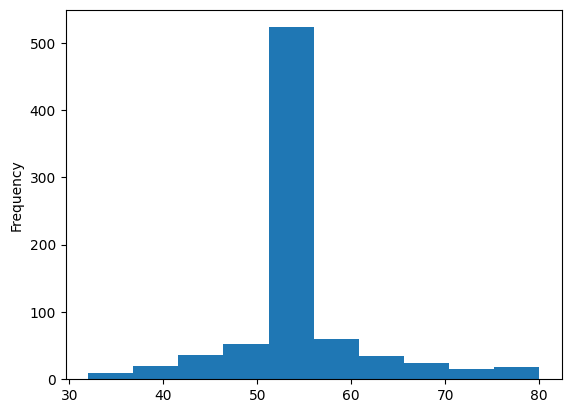

In [32]:
b4['Rotation'].plot(kind='hist')

mean: Plane, Connection,Rotation

## Replace mssing values for values with the mean of that bucket:

In [8]:
nan_count1 = b1.isna().sum().sum()
nan_count2 = b2.isna().sum().sum()
nan_count3 = b3.isna().sum().sum()
nan_count4 = b4.isna().sum().sum()
print(nan_count1)
print(nan_count2)
print(nan_count3)
print(nan_count4)

2214
4311
5022
4203


In [11]:
cols=['Plane', 'Connection', 'Rotation', 'BatSpeed','RotationalAcceleration', 'OnPlaneEfficiency', 'Power', 'TimeToContact','PeakHandSpeed', 'H1', 'HH', 'armVelo', 'exitVelo']
for db in [b1,b2,b3,b4]:
    for col in cols:
        mean = db[col].mean()
        db[col].fillna(value=mean, inplace=True)

In [12]:
nan_count1 = b1.isna().sum().sum()
nan_count2 = b2.isna().sum().sum()
nan_count3 = b3.isna().sum().sum()
nan_count4 = b4.isna().sum().sum()
print(nan_count1)
print(nan_count2)
print(nan_count3)
print(nan_count4)

0
0
0
0


In [13]:
b1.to_csv('b1Mean.csv')
b2.to_csv('b2Mean.csv')
b3.to_csv('b3Mean.csv')
b4.to_csv('b4Mean.csv')

# 5.) Data Exploration <a class="anchor" id="Explore"></a>

### Get averages for each category for each division:
The trends show that the times with division and the velocities decrease with division.

In [139]:
datab1[['H1',"HH",'armVelo','exitVelo','Plane','Connection','Rotation','BatSpeed','RotationalAcceleration','OnPlaneEfficiency','Power','TimeToContact','PeakHandSpeed']].mean()

H1                         3.096024
HH                        12.130423
armVelo                   57.933136
exitVelo                  67.477022
Plane                     51.944928
Connection                53.168116
Rotation                  55.695652
BatSpeed                  60.042319
RotationalAcceleration    10.475652
OnPlaneEfficiency         65.649275
Power                      2.211014
TimeToContact              0.166667
PeakHandSpeed             18.000870
dtype: float64

In [141]:
datab2[['H1',"HH",'armVelo','exitVelo','Plane','Connection','Rotation','BatSpeed','RotationalAcceleration','OnPlaneEfficiency','Power','TimeToContact','PeakHandSpeed']].mean()

H1                         3.138414
HH                        12.410091
armVelo                   56.467132
exitVelo                  65.098623
Plane                     52.860465
Connection                52.895349
Rotation                  55.023256
BatSpeed                  57.603198
RotationalAcceleration     9.968314
OnPlaneEfficiency         66.098837
Power                      1.959797
TimeToContact              0.169302
PeakHandSpeed             17.550581
dtype: float64

In [142]:
datab3[['H1',"HH",'armVelo','exitVelo','Plane','Connection','Rotation','BatSpeed','RotationalAcceleration','OnPlaneEfficiency','Power','TimeToContact','PeakHandSpeed']].mean()

H1                         3.199212
HH                        12.727327
armVelo                   55.104487
exitVelo                  63.393429
Plane                     54.327801
Connection                53.703320
Rotation                  56.139004
BatSpeed                  57.132988
RotationalAcceleration    10.386515
OnPlaneEfficiency         67.684647
Power                      1.919689
TimeToContact              0.170062
PeakHandSpeed             17.822199
dtype: float64

In [143]:
datab4[['H1',"HH",'armVelo','exitVelo','Plane','Connection','Rotation','BatSpeed','RotationalAcceleration','OnPlaneEfficiency','Power','TimeToContact','PeakHandSpeed']].mean()

H1                         3.236757
HH                        13.035195
armVelo                   53.637385
exitVelo                  61.458018
Plane                     56.073394
Connection                53.269113
Rotation                  55.458716
BatSpeed                  55.846789
RotationalAcceleration    10.300306
OnPlaneEfficiency         69.547401
Power                      1.820917
TimeToContact              0.170459
PeakHandSpeed             17.604587
dtype: float64

### Get quartiles for each category and division:

In [144]:
datab1[['H1',"HH",'armVelo','exitVelo','Plane','Connection','Rotation','BatSpeed','RotationalAcceleration','OnPlaneEfficiency','Power','TimeToContact','PeakHandSpeed']].quantile([.25,.5,.75])

,H1,HH,armVelo,exitVelo,Plane,Connection,Rotation,BatSpeed,RotationalAcceleration,OnPlaneEfficiency,Power,TimeToContact,PeakHandSpeed
0.25,2.9675,11.5925,55.0,64.333333,43.0,47.0,48.0,57.2,7.6,56.0,1.94,0.16,16.9
0.50,3.0800,12.0200,58.5,68.000000,53.0,54.0,55.0,60.2,9.8,67.0,2.21,0.17,17.9
0.75,3.2000,12.5350,61.5,71.000000,61.0,59.0,64.0,63.1,12.8,75.0,2.49,0.18,19.1


In [145]:
datab2[['H1',"HH",'armVelo','exitVelo','Plane','Connection','Rotation','BatSpeed','RotationalAcceleration','OnPlaneEfficiency','Power','TimeToContact','PeakHandSpeed']].quantile([.25,.5,.75])

,H1,HH,armVelo,exitVelo,Plane,Connection,Rotation,BatSpeed,RotationalAcceleration,OnPlaneEfficiency,Power,TimeToContact,PeakHandSpeed
0.25,3.00,11.855,53.666667,61.666667,45.0,47.0,47.75,54.90,7.2,57.0,1.69,0.16,16.500
0.50,3.13,12.320,56.666667,65.000000,53.0,53.0,53.00,57.65,9.2,67.0,1.94,0.17,17.500
0.75,3.26,12.890,59.500000,68.666667,61.0,59.0,62.00,60.60,12.3,75.0,2.24,0.18,18.525


In [146]:
datab3[['H1',"HH",'armVelo','exitVelo','Plane','Connection','Rotation','BatSpeed','RotationalAcceleration','OnPlaneEfficiency','Power','TimeToContact','PeakHandSpeed']].quantile([.25,.5,.75])

,H1,HH,armVelo,exitVelo,Plane,Connection,Rotation,BatSpeed,RotationalAcceleration,OnPlaneEfficiency,Power,TimeToContact,PeakHandSpeed
0.25,3.05,12.1400,52.000000,60.0,46.0,48.0,47.0,54.5,7.2,60.0,1.69,0.16,16.7
0.50,3.18,12.6400,55.333333,63.5,55.0,54.0,55.0,57.2,9.9,68.0,1.89,0.17,17.8
0.75,3.33,13.2025,58.000000,67.0,62.0,60.0,64.0,59.7,12.9,76.0,2.15,0.18,18.9


In [147]:
datab3[['H1',"HH",'armVelo','exitVelo','Plane','Connection','Rotation','BatSpeed','RotationalAcceleration','OnPlaneEfficiency','Power','TimeToContact','PeakHandSpeed']].quantile([.25,.5,.75])

,H1,HH,armVelo,exitVelo,Plane,Connection,Rotation,BatSpeed,RotationalAcceleration,OnPlaneEfficiency,Power,TimeToContact,PeakHandSpeed
0.25,3.05,12.1400,52.000000,60.0,46.0,48.0,47.0,54.5,7.2,60.0,1.69,0.16,16.7
0.50,3.18,12.6400,55.333333,63.5,55.0,54.0,55.0,57.2,9.9,68.0,1.89,0.17,17.8
0.75,3.33,13.2025,58.000000,67.0,62.0,60.0,64.0,59.7,12.9,76.0,2.15,0.18,18.9


# 6. Data Visualizations <a class="anchor" id="Visual"></a>

In [22]:
import matplotlib.pyplot as plt
b1 = pd.read_csv('b1mean.csv')
b2 = pd.read_csv('b2mean.csv')
b3 = pd.read_csv('b3mean.csv')
b4 = pd.read_csv('b4mean.csv')

In [11]:
b1.columns

Index(['Unnamed: 0', 'CollegePlayerType', 'Plane', 'Connection', 'Rotation',
       'BatSpeed', 'RotationalAcceleration', 'OnPlaneEfficiency', 'Power',
       'TimeToContact', 'PeakHandSpeed', 'H1', 'HH', 'armVelo', 'exitVelo'],
      dtype='object')

In [8]:
b1["HH"].mean()

12.130423011844332

In [15]:
stats=["HH","BatSpeed","armVelo"]

In [11]:
HHMeans=[]
batMeans=[]
avMeans=[]
evMeans=[]
for b in [b1,b2,b3,b4]:
    HHMeans.append(b["HH"].mean())
    batMeans.append(b["BatSpeed"].mean())
    avMeans.append(b["armVelo"].mean())
    evMeans.append(b["exitVelo"].mean())

In [44]:
batMeans

[60.04231884057972, 57.60319767441862, 57.132987551867224, 55.84678899082568]

In [148]:
dataDivisions=[datab1,datab2,datab3,datab4]

In [23]:
b1['armVelo']

0      56.666667
1      52.500000
2      51.666667
3      49.333333
4      51.000000
         ...    
586    65.000000
587    60.500000
588    55.500000
589    65.000000
590    60.000000
Name: armVelo, Length: 591, dtype: float64

In [24]:
b1['CollegePlayerType']

0            Starter
1            Starter
2            Starter
3            Starter
4        Role Player
           ...      
586          Starter
587      Role Player
588          Starter
589      Role Player
590    Impact Player
Name: CollegePlayerType, Length: 591, dtype: object

In [66]:
playerTypeb1Means=[]
#df[df['B']==3]['A']
for t in ['Impact Player','Starter','Role Player']:
    mean = b1[b1['CollegePlayerType']==t]['Power'].mean()
    playerTypeb1Means.append(mean)

In [36]:
playerTypeb1Means

[59.18648648648649, 58.478017241379305, 56.86243279569892]

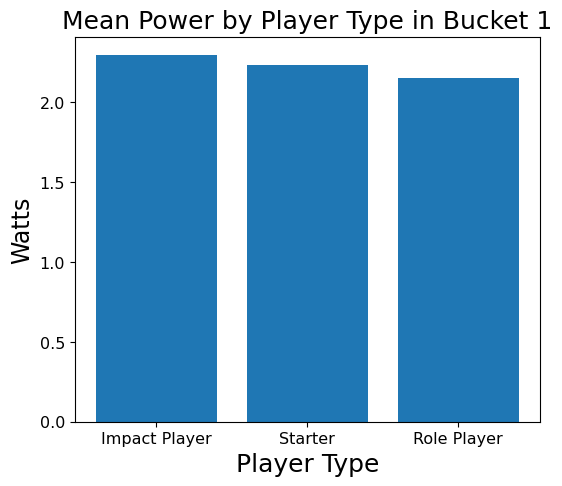

In [74]:
plt.figure(figsize=(6,5))
plt.bar(['Impact Player','Starter','Role Player'],playerTypeb1Means)
plt.rcParams.update({'font.size': 12})
plt.xlabel("Player Type", fontsize=18)
plt.ylabel("Watts", fontsize=17)
plt.title("Mean Power by Player Type in Bucket 1", fontsize=18)
plt.savefig("Powerb1")

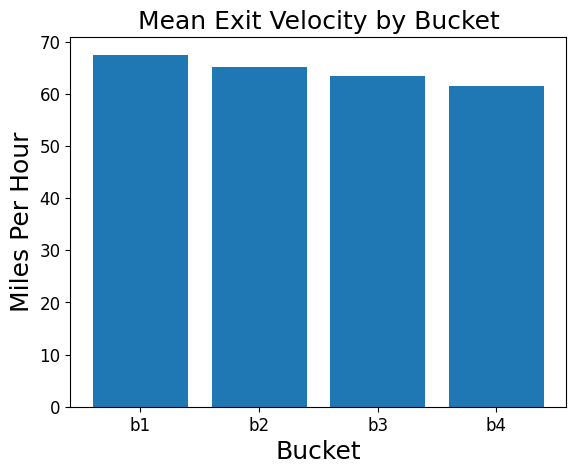

In [12]:
plt.bar(['b1','b2','b3','b4'],evMeans)
plt.rcParams.update({'font.size': 12})
plt.xlabel("Bucket", fontsize=18)
plt.ylabel("Miles Per Hour", fontsize=18)
plt.title("Mean Exit Velocity by Bucket", fontsize=18)
plt.savefig("exitveloMeansBucket")

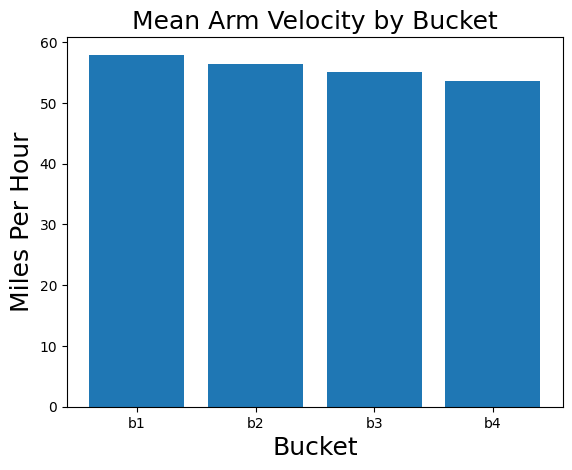

In [9]:
plt.bar(['b1','b2','b3','b4'],avMeans)
plt.rcParams.update({'font.size': 12})
plt.xlabel("Bucket", fontsize=18)
plt.ylabel("Miles Per Hour", fontsize=18)
plt.title("Mean Arm Velocity by Bucket", fontsize=18)
plt.savefig("armveloMeansBucket")

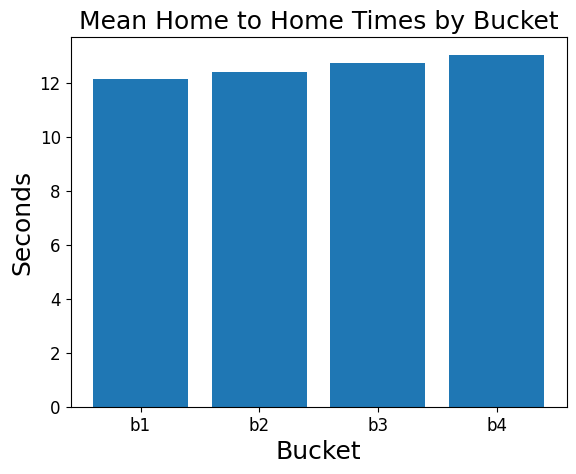

In [43]:
plt.bar(['b1','b2','b3','b4'],HHMeans)
plt.rcParams.update({'font.size': 12})
plt.xlabel("Bucket", fontsize=18)
plt.ylabel("Seconds", fontsize=18)
plt.title("Mean Home to Home Times by Bucket", fontsize=18)
plt.savefig("HHMeansBucket")

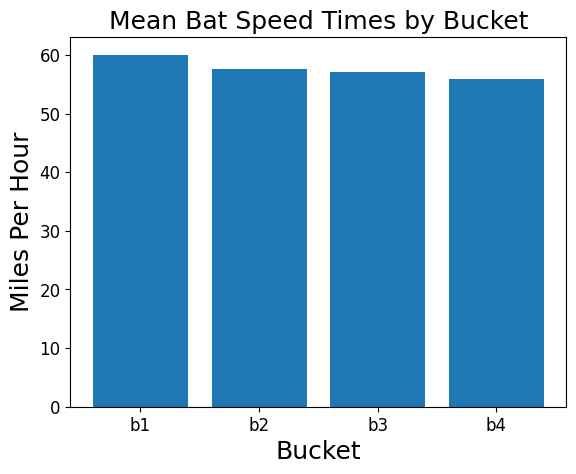

In [46]:
plt.bar(['b1','b2','b3','b4'],batMeans)
plt.rcParams.update({'font.size': 12})
plt.xlabel("Bucket", fontsize=18)
plt.ylabel("Miles Per Hour", fontsize=18)
plt.title("Mean Bat Speed Times by Bucket", fontsize=18)
plt.savefig("batMeansBucket")

In [48]:
b3["HH"][0]

13.39

In [51]:
playerMeanDict={"Impact Player":[],"Role Player":[], "Starter":[]}
for i in range(len(b3)):
    playerMeanDict[b3['CollegePlayerType'][i]].append(b3['HH'][i])

In [55]:
#playerMeanDict
impMean=sum(playerMeanDict['Impact Player'])/len(playerMeanDict['Impact Player'])
impMean

12.544371980676328

In [56]:
roleMean=sum(playerMeanDict['Role Player'])/len(playerMeanDict['Role Player'])
roleMean

12.867209302325572

In [57]:
startMean=sum(playerMeanDict['Starter'])/len(playerMeanDict['Starter'])
startMean

12.690863228699543

In [58]:
playerType=["Impact","Starter","Role"]
roleMeans=[impMean,startMean,roleMean]

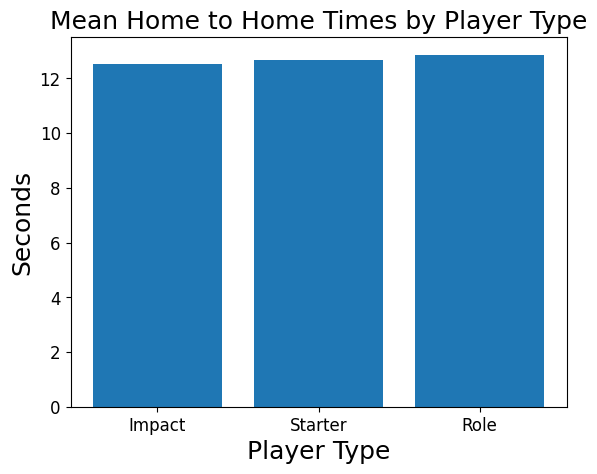

In [60]:
plt.bar(playerType,roleMeans)
plt.rcParams.update({'font.size': 12})
plt.xlabel("Player Type", fontsize=18)
plt.ylabel("Seconds", fontsize=18)
plt.title("Mean Home to Home Times by Player Type", fontsize=18)
plt.savefig("HHMeanspType")

In [149]:
categories=['HH','H1','armVelo','exitVelo']

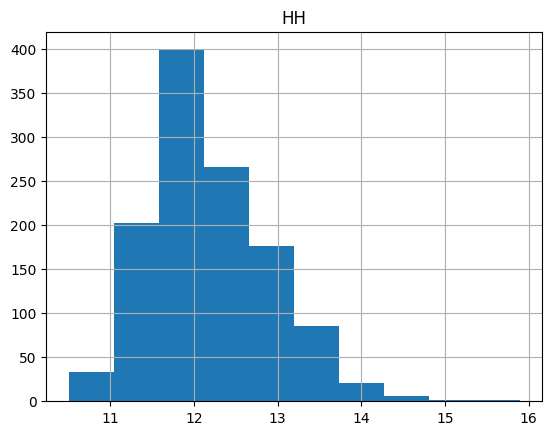

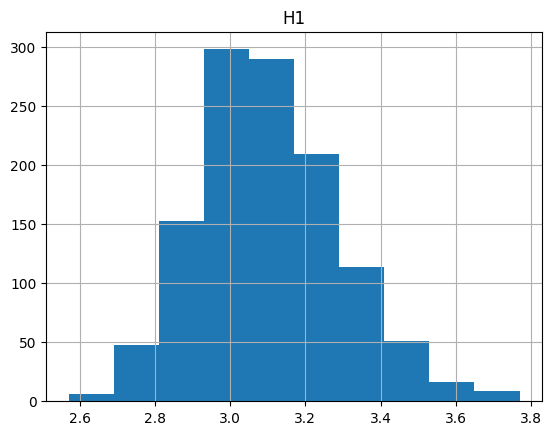

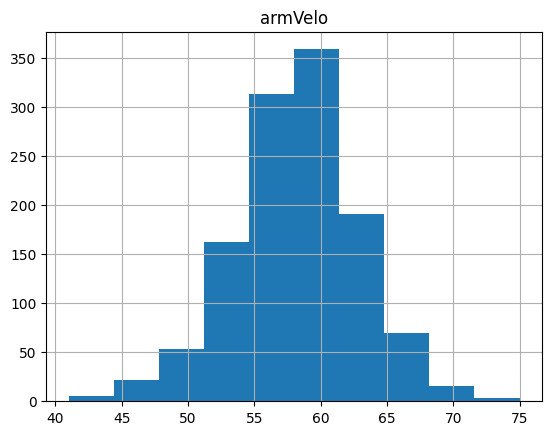

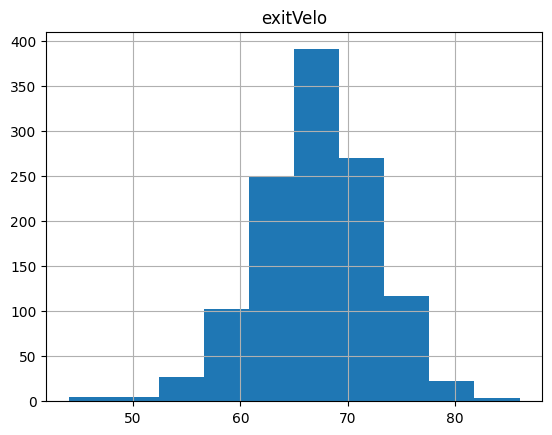

In [150]:
for cat in categories:
    dataDiv1.hist(column=cat)

### Make histograms next to each other for each category:

In [48]:
import matplotlib.pyplot as plt

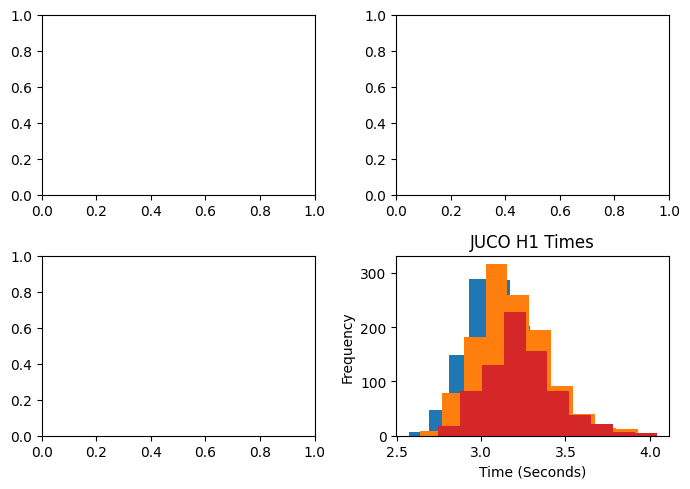

In [295]:
plt.rcParams["figure.figsize"] = [7, 5]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(2,2)

plt.hist(dataDiv1['H1'])
plt.title('Division 1 H1 Times')
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency')

plt.hist(dataDiv2NAIA['H1'])
plt.title('Division 2 & NAIA H1 Times')
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency')

plt.hist(dataDiv3['H1'])
plt.title('Division 3 H1 Times')
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency')

plt.hist(dataJUCO['H1'])
plt.title('JUCO H1 Times')
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency')

plt.show()

Text(0, 0.5, 'Frequency')

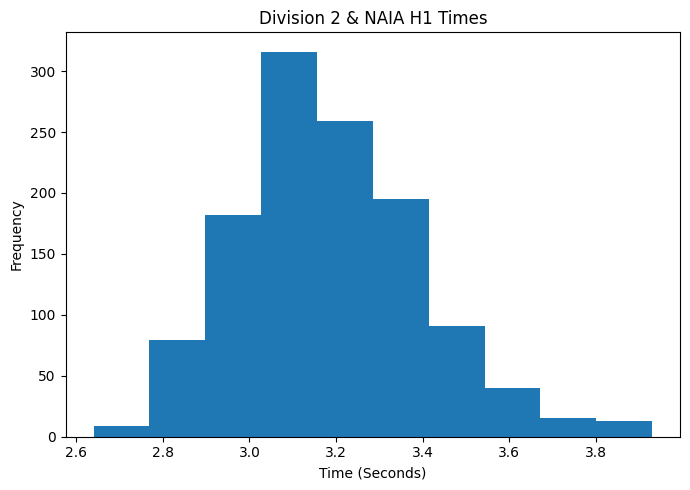

In [288]:
plt.hist(dataDiv2NAIA['H1'])
plt.title('Division 2 & NAIA H1 Times')
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

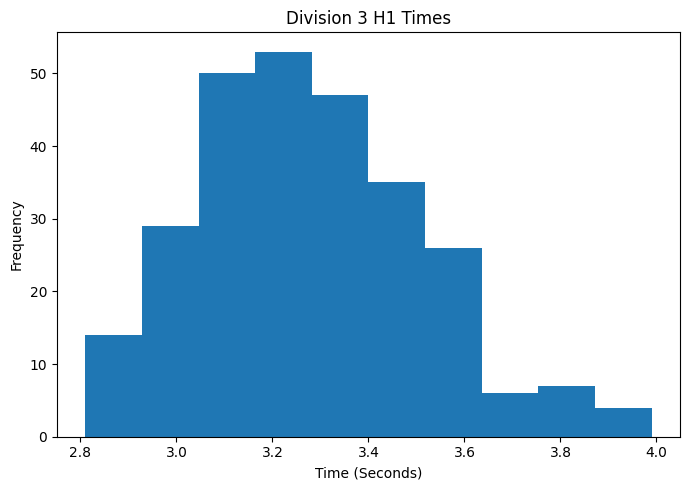

In [289]:
plt.hist(dataDiv3['H1'])
plt.title('Division 3 H1 Times')
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

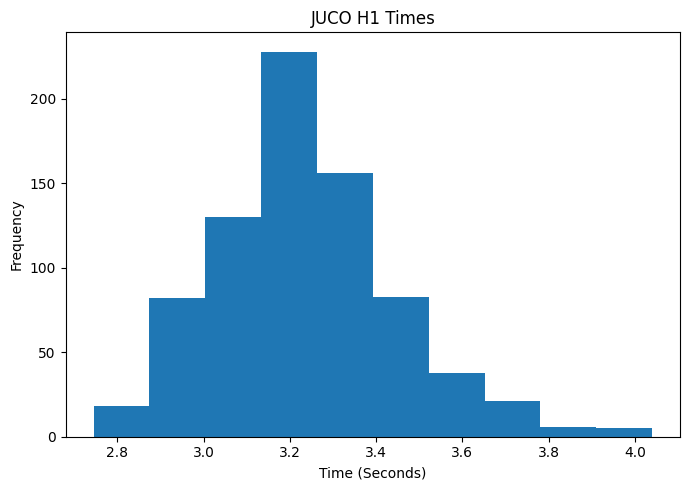

In [290]:
plt.hist(dataJUCO['H1'])
plt.title('JUCO H1 Times')
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency')